In [1]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create lists to save the labels (the name of the shape)
labels = []
images = []
shape_dir = '/mnt/c/Users/DeWayne Halfen/Documents/Data Science/DataSets/fruits/fruits-360/Training/'
shapes = os.listdir(shape_dir)

#iterate through each shape
for shape in shapes:
    print('Getting data for: ', shape)
    #iterate through each file in the folder
    for path in os.listdir(shape_dir+shape):
        #add the image to the list of images
        images.append(cv2.cvtColor(cv2.imread(shape_dir+shape+'/'+path, 1), cv2.COLOR_BGR2RGB))
        #add an integer to the labels list 
        labels.append(shapes.index(shape))

Getting data for:  Apple Braeburn
Getting data for:  Apple Golden 1
Getting data for:  Apple Golden 2
Getting data for:  Apple Golden 3
Getting data for:  Apple Granny Smith
Getting data for:  Apple Red 1
Getting data for:  Apple Red 2
Getting data for:  Apple Red 3
Getting data for:  Apple Red Delicious
Getting data for:  Apple Red Yellow
Getting data for:  Apricot
Getting data for:  Avocado
Getting data for:  Avocado ripe
Getting data for:  Banana
Getting data for:  Banana Red
Getting data for:  Cactus fruit
Getting data for:  Carambula
Getting data for:  Cherry
Getting data for:  Clementine
Getting data for:  Cocos
Getting data for:  Dates
Getting data for:  Granadilla
Getting data for:  Grape Pink
Getting data for:  Grape White
Getting data for:  Grape White 2
Getting data for:  Grapefruit Pink
Getting data for:  Grapefruit White
Getting data for:  Guava
Getting data for:  Huckleberry
Getting data for:  Kaki
Getting data for:  Kiwi
Getting data for:  Kumquats
Getting data for:  Lem

In [3]:
image_array = np.array(images)
label_array = np.array(labels)
image_array.shape

(28736, 100, 100, 3)

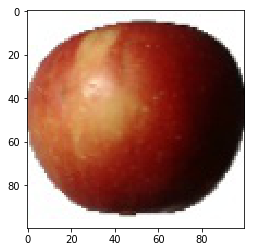

In [4]:
plt.imshow(image_array[0,:,:,:])

In [5]:
#create lists to save the labels (the name of the shape)
labels_val = []
images_val = []
shape_dir = '/mnt/c/Users/DeWayne Halfen/Documents/Data Science/DataSets/fruits/fruits-360/Validation/'
shapes = os.listdir(shape_dir)

#iterate through each shape
for shape in shapes:
    print('Getting data for: ', shape)
    #iterate through each file in the folder
    for path in os.listdir(shape_dir+shape):
        #add the image to the list of images
        images_val.append(cv2.cvtColor(cv2.imread(shape_dir+shape+'/'+path, 1), cv2.COLOR_BGR2RGB))
        #add an integer to the labels list 
        labels_val.append(shapes.index(shape))

Getting data for:  Apple Braeburn
Getting data for:  Apple Golden 1
Getting data for:  Apple Golden 2
Getting data for:  Apple Golden 3
Getting data for:  Apple Granny Smith
Getting data for:  Apple Red 1
Getting data for:  Apple Red 2
Getting data for:  Apple Red 3
Getting data for:  Apple Red Delicious
Getting data for:  Apple Red Yellow
Getting data for:  Apricot
Getting data for:  Avocado
Getting data for:  Avocado ripe
Getting data for:  Banana
Getting data for:  Banana Red
Getting data for:  Cactus fruit
Getting data for:  Carambula
Getting data for:  Cherry
Getting data for:  Clementine
Getting data for:  Cocos
Getting data for:  Dates
Getting data for:  Granadilla
Getting data for:  Grape Pink
Getting data for:  Grape White
Getting data for:  Grape White 2
Getting data for:  Grapefruit Pink
Getting data for:  Grapefruit White
Getting data for:  Guava
Getting data for:  Huckleberry
Getting data for:  Kaki
Getting data for:  Kiwi
Getting data for:  Kumquats
Getting data for:  Lem

In [6]:
image_val_array = np.array(images_val)
label_val_array = np.array(labels_val)
image_val_array.shape

(9673, 100, 100, 3)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, label_array, test_size = 0.2, random_state=42, stratify=label_array)

In [8]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
print('Validation data shape : ', image_val_array.shape, label_val_array.shape)

Training data shape :  (22988, 100, 100, 3) (22988,)
Testing data shape :  (5748, 100, 100, 3) (5748,)
Validation data shape :  (9673, 100, 100, 3) (9673,)


In [9]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  60
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


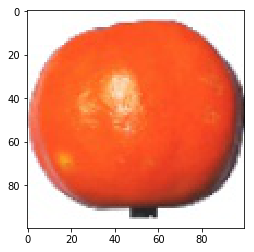

In [10]:
plt.imshow(X_train[0,:,:,:])

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = image_val_array.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
X_val = X_val /255.

In [12]:
#Make a flattened version for some of our models
#X_flat_train = X_train.reshape(X_train.shape[0], 100*100*3)
#X_flat_test = X_test.reshape(X_test.shape[0], 100*100*3)

#X_train = X_train.reshape(-1, 100, 100, 3)
#X_test = X_test.reshape(-1, 100, 100, 3)
#print('Training data shape : ', X_flat_train.shape, y_train.shape)
#print('Testing data shape : ', X_flat_test.shape, y_test.shape)

In [13]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(label_val_array)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

/home/halfendt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Original label: 18
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
X_train.shape, y_train_one_hot.shape, X_test.shape, y_test_one_hot.shape, image_val_array.shape, y_val_one_hot.shape

((22988, 100, 100, 3),
 (22988, 60),
 (5748, 100, 100, 3),
 (5748, 60),
 (9673, 100, 100, 3),
 (9673, 60))

In [15]:
# Import necessary modules
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [16]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', input_shape=X_train[0].shape, padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(Dense(60, activation='softmax'))

In [17]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 128)     3584      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        73792     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
__________

In [19]:
train = model.fit(X_train, y_train_one_hot, batch_size=64, epochs=20, verbose=1,
                  validation_data=(X_val, y_val_one_hot), callbacks=[early_stopping_monitor])

Train on 22988 samples, validate on 9673 samples
Epoch 1/20
22988/22988 [==============================] - 821s 36ms/step - loss: 2.7378 - acc: 0.2869 - val_loss: 1.2738 - val_acc: 0.6573
Epoch 2/20
22988/22988 [==============================] - 778s 34ms/step - loss: 1.0803 - acc: 0.6837 - val_loss: 0.6251 - val_acc: 0.8152
Epoch 3/20
22988/22988 [==============================] - 791s 34ms/step - loss: 0.6158 - acc: 0.8176 - val_loss: 0.4603 - val_acc: 0.8688
Epoch 4/20
22988/22988 [==============================] - 779s 34ms/step - loss: 0.3906 - acc: 0.8810 - val_loss: 0.3634 - val_acc: 0.8980
Epoch 5/20
22988/22988 [==============================] - 793s 35ms/step - loss: 0.2879 - acc: 0.9125 - val_loss: 0.3027 - val_acc: 0.9062
Epoch 6/20
22988/22988 [==============================] - 813s 35ms/step - loss: 0.2227 - acc: 0.9321 - val_loss: 0.2683 - val_acc: 0.9259
Epoch 7/20
22988/22988 [==============================] - 822s 36ms/step - loss: 0.1666 - acc: 0.9495 - val_loss: 0.2

In [20]:
model.save("model_fruit.h5py")

In [21]:
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=1)

5748/5748 [==============================] - 60s 10ms/step


In [22]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.01658139647005376
Test accuracy: 0.9965205288796103


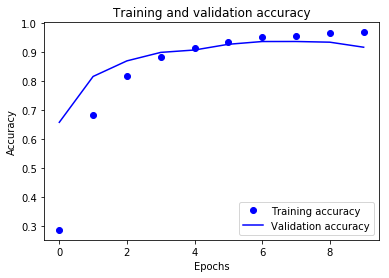

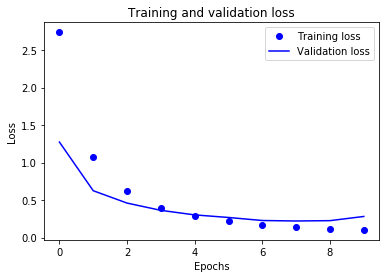

In [23]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
predicted_classes = model.predict(X_test)

In [25]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [26]:
predicted_classes.shape, y_test.shape

((5748,), (5748,))

Found 5728 correct labels


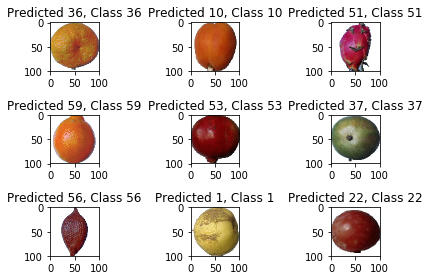

In [27]:
correct = np.where(predicted_classes==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(100,100,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 20 incorrect labels


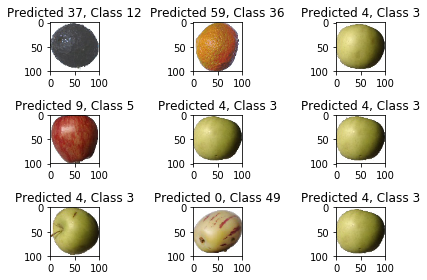

In [28]:
incorrect = np.where(predicted_classes!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(100,100,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [29]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(60)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.97      1.00      0.98        98
    Class 1       1.00      0.98      0.99        98
    Class 2       1.00      1.00      1.00        99
    Class 3       0.99      0.89      0.93        96
    Class 4       0.90      1.00      0.95        99
    Class 5       1.00      0.99      0.99        98
    Class 6       1.00      1.00      1.00        98
    Class 7       1.00      1.00      1.00        86
    Class 8       1.00      0.99      0.99        98
    Class 9       0.99      1.00      0.99        99
   Class 10       1.00      1.00      1.00        98
   Class 11       1.00      1.00      1.00        85
   Class 12       1.00      0.99      0.99        98
   Class 13       1.00      1.00      1.00        98
   Class 14       1.00      0.99      0.99        98
   Class 15       1.00      1.00      1.00        98
   Class 16       1.00      1.00      1.00        98
   Class 17       1.00      1.00      1.00   

In [30]:
# Calculate confusion matrix on test data
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_classes)
print(confusion_matrix)

[[98  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 96  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 99  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 85 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 99  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 97  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 

In [32]:
shapes[4]

'Apple Granny Smith'

In [33]:
shapes[3]

'Apple Golden 3'